<a href="https://colab.research.google.com/github/SreeLakshmi1242/Projects/blob/main/LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
df = pd.read_csv( 'hour.csv')

print the first five rows of dataset

In [ ]:

df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

<Axes: xlabel='hr'>

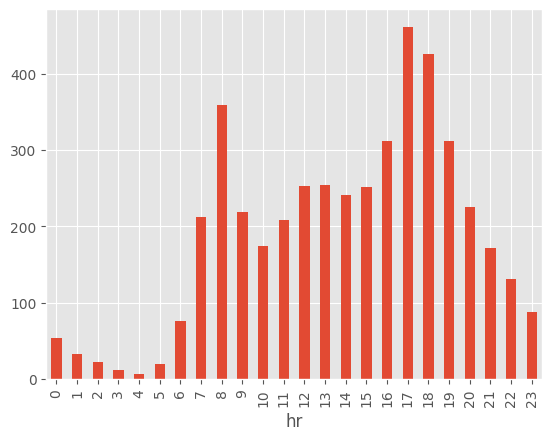

In [ ]:

df.groupby('hr')['cnt'].mean().plot(kind='bar')

#### Describe the relation of weekday, holiday and working day

In [ ]:
df.groupby(['weekday','holiday','workingday'])[['cnt','casual','registered']].agg([pd.Series.mean,pd.Series.median])

cnt             casual         registered  \
                                  mean median        mean median        mean   
weekday holiday workingday                                                     
0       0       0           177.468825  116.0   56.163469   24.0  121.305356   
1       0       1           186.568332  142.5   25.459001   14.0  161.109331   
        1       0           166.960784  100.0   46.946779   19.0  120.014006   
2       0       1           192.632099  149.0   23.622634   13.5  169.009465   
        1       0            44.043478   32.0   19.130435    8.0   24.913043   
3       0       1           189.981640  142.0   22.340677   12.0  167.640963   
        1       0           308.458333  401.5  106.750000  149.0  201.708333   
4       0       1           198.710277  156.0   24.739992   14.0  173.970285   
        1       0            81.666667   46.0   31.562500   13.0   50.104167   
5       0       1           197.333333  165.0   31.634276   17.0  165.699057   
        1       0           135.291667  129.0   22.541667   16.0  112.750000   
6       0       0           190.209793  129.0   61.246815   25.0  128.962978   

                                   
                           median  
weekday holiday workingday         
0       0       0            89.0  
1       0       1           118.0  
        1       0            77.0  
2       0       1           123.0  
        1       0            21.0  
3       0       1           121.0  
        1       0           239.5  
4       0       1           133.0  
        1       0            38.0  
5       0       1           137.0  
        1       0           101.5  
6       0       0           100.5

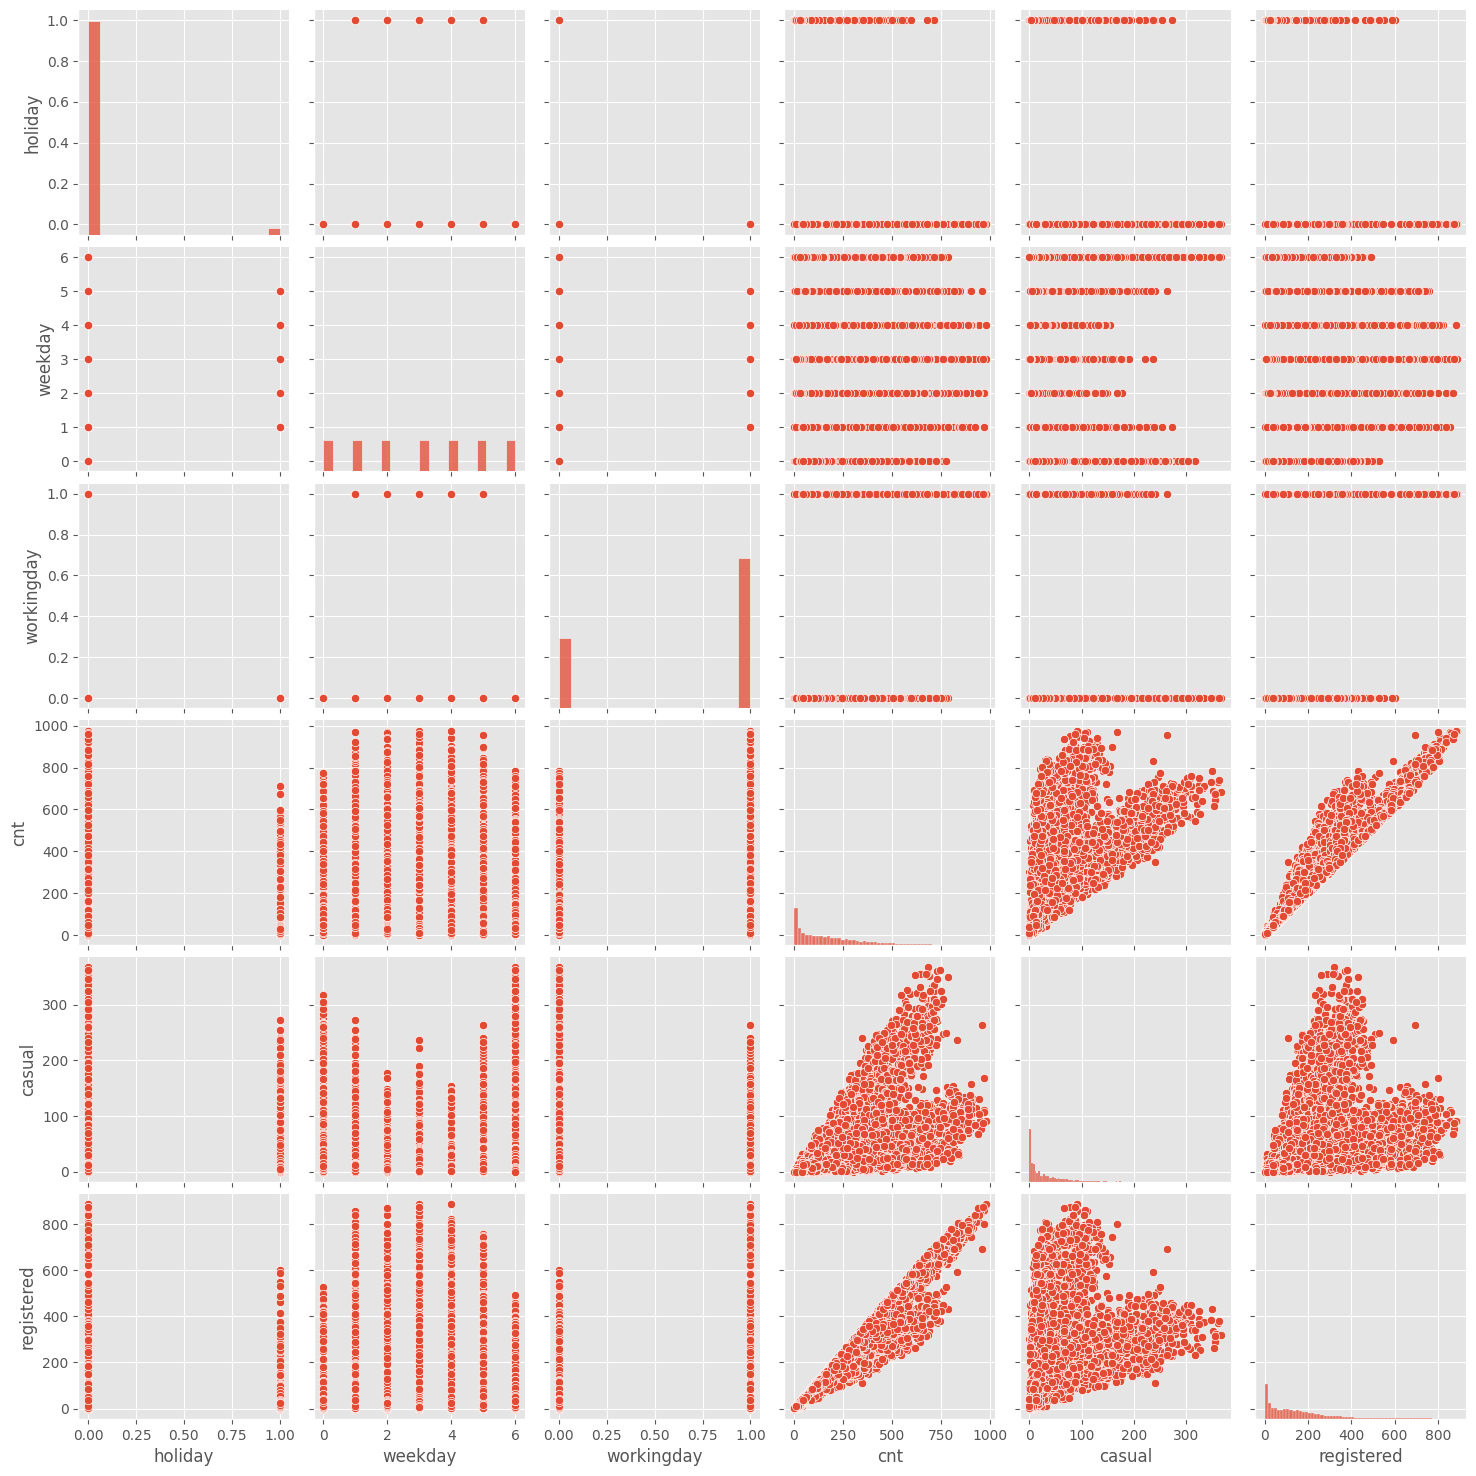

In [ ]:
# YOUR CODE HERE
plt.style.use('ggplot')
sns.pairplot(df[['holiday','weekday','workingday','cnt','casual','registered']])

In [ ]:
df.groupby(['hr','weekday'])[['cnt','casual','registered']].mean()

cnt     casual  registered
hr weekday                                   
0  0         93.990385  18.230769   75.759615
   1         34.009524   9.419048   24.590476
   2         27.623762   5.772277   21.851485
   3         34.557692   5.875000   28.682692
   4         39.271845   6.844660   32.427184
...                ...        ...         ...
23 2         76.173077  10.788462   65.384615
   3         83.737864  12.184466   71.553398
   4         96.750000  13.326923   83.423077
   5        115.211538  19.490385   95.721154
   6        115.855769  25.778846   90.076923

[168 rows x 3 columns]

In [ ]:
df.groupby(['hr','holiday'])[['cnt','casual','registered']].mean()

cnt      casual  registered
hr holiday                                    
0  0         53.791489   10.029787   43.761702
   1         57.476190   14.476190   43.000000
1  0         33.210526    6.426743   26.783784
   1         38.904762    9.095238   29.809524
2  0         22.791066    4.678674   18.112392
   1         25.476190    7.857143   17.619048
3  0         11.730486    2.701031    9.029455
   1         11.611111    3.277778    8.333333
4  0          6.367799    1.237814    5.129985
   1          5.850000    1.800000    4.050000
5  0         20.169540    1.406609   18.762931
   1         10.619048    1.571429    9.047619
6  0         77.468750    4.180398   73.288352
   1         28.285714    3.523810   24.761905
7  0        215.929178   11.131728  204.797450
   1         82.142857    8.476190   73.666667
8  0        364.617564   21.621813  342.995751
   1        170.523810   23.619048  146.904762
9  0        220.740793   30.502833  190.237960
   1        171.190476   43.952381  127.238095
10 0        172.781870   45.729462  127.052408
   1        203.476190   71.619048  131.857143
11 0        206.941926   58.638810  148.303116
   1        248.523810   89.857143  158.666667
12 0        252.311174   67.371994  184.939180
   1        287.142857   99.333333  187.809524
13 0        252.330508   71.337571  180.992938
   1        298.523810  105.047619  193.476190
14 0        239.604520   74.718927  164.885593
   1        286.285714  104.190476  182.095238
15 0        250.820621   74.502825  176.317797
   1        265.142857   88.476190  176.666667
16 0        313.159379   73.351199  239.808181
   1        272.285714   87.047619  185.238095
17 0        466.437236   74.244006  392.193230
   1        293.142857   75.285714  217.857143
18 0        430.166902   61.151344  369.015559
   1        268.761905   60.095238  208.666667
19 0        314.189533   48.765205  265.424328
   1        221.761905   48.952381  172.809524
20 0        227.458274   35.942008  191.516266
   1        177.952381   46.047619  131.904762
21 0        173.123055   28.021216  145.101839
   1        145.095238   36.142857  108.952381
22 0        132.002829   22.151344  109.851485
   1        108.857143   25.666667   83.190476
23 0         88.719943   15.357850   73.362093
   1         57.904762    9.857143   48.047619

In [ ]:
df.groupby(['hr','workingday'])[['cnt','casual','registered']].mean()

cnt      casual  registered
hr workingday                                    
0  0            90.800000   16.647826   74.152174
   1            36.786290    7.149194   29.637097
1  0            69.508696   12.504348   57.004348
   1            16.552632    3.710526   12.842105
2  0            53.171053   10.399123   42.771930
   1             8.683778    2.137577    6.546201
3  0            25.775330    6.453744   19.321586
   1             4.942553    0.910638    4.031915
4  0             8.264317    2.264317    6.000000
   1             5.429787    0.765957    4.663830
5  0             8.689189    1.725225    6.963964
   1            24.913131    1.270707   23.642424
6  0            18.742358    3.820961   14.921397
   1           102.500000    4.318548   98.181452
7  0            43.406926    8.606061   34.800866
   1           290.612903   12.195565  278.417339
8  0           105.653680   20.424242   85.229437
   1           477.006048   22.264113  454.741935
9  0           171.623377   45.017316  126.606061
   1           241.518145   24.312500  217.205645
10 0           255.909091   79.268398  176.640693
   1           135.366935   31.205645  104.161290
11 0           315.316017  106.653680  208.662338
   1           158.229839   37.598790  120.631048
12 0           366.259740  126.246753  240.012987
   1           200.820926   41.358149  159.462777
13 0           372.731602  136.424242  236.307359
   1           198.429719   42.568273  155.861446
14 0           364.645022  139.593074  225.051948
   1           183.572289   45.869478  137.702811
15 0           358.813853  136.502165  222.311688
   1           201.331325   46.333333  154.997992
16 0           352.727273  128.614719  224.112554
   1           293.122244   48.344689  244.777555
17 0           323.549784  111.813853  211.735931
   1           525.290581   56.895792  468.394790
18 0           281.056522   84.221739  196.834783
   1           492.226908   50.451807  441.775100
19 0           231.673913   65.547826  166.126087
   1           348.401606   41.022088  307.379518
20 0           174.739130   46.765217  127.973913
   1           249.718876   31.369478  218.349398
21 0           142.060870   36.147826  105.913043
   1           186.287149   24.610442  161.676707
22 0           116.060870   28.056522   88.004348
   1           138.389558   19.572289  118.817269
23 0            85.930435   19.139130   66.791304
   1            88.708835   13.379518   75.329317

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

<Axes: xlabel='mnth'>

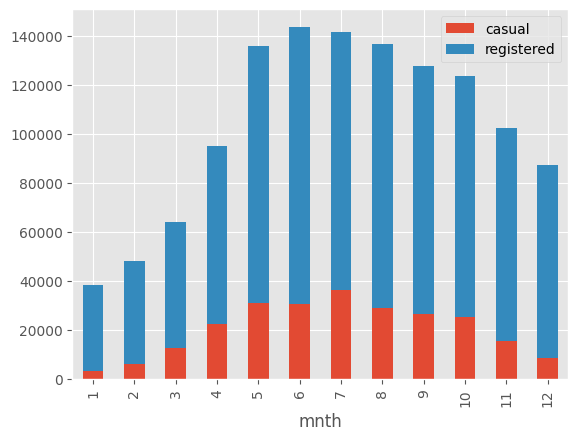

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
df[df['dteday'].str[:4]=='2011'].groupby('mnth')[['casual','registered']].sum().plot(kind='bar',stacked=True)

<Axes: xlabel='mnth'>

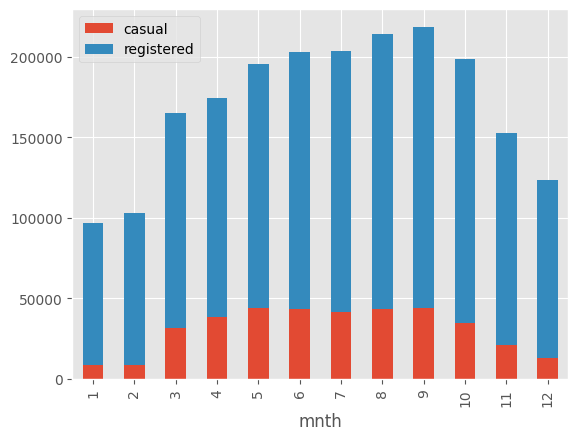

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df[df['dteday'].str[:4]=='2012'].groupby('mnth')[['casual','registered']].sum().plot(kind='bar',stacked=True)

#### Analyze the correlation between features with heatmap

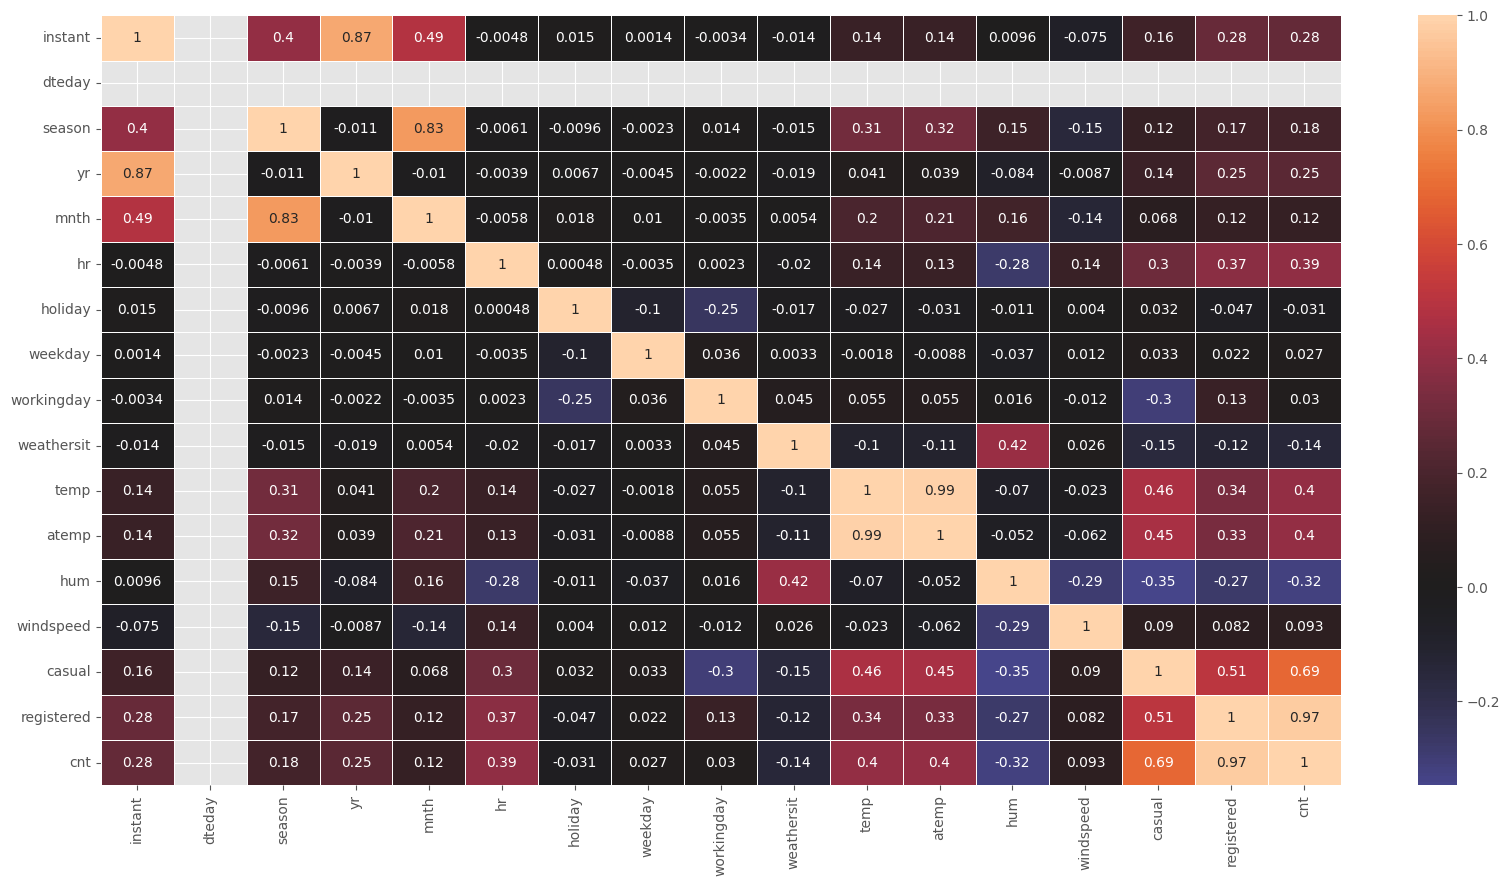

In [ ]:
# YOUR CODE HERE
df = df.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, center=0)
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

<Axes: >

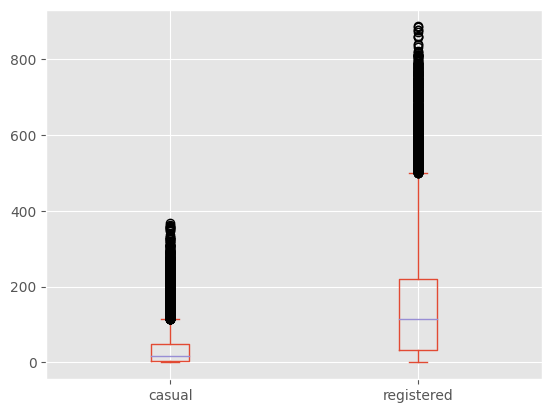

In [ ]:
# YOUR CODE HERE
df[['casual','registered']].plot(kind='box')

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# YOUR CODE HERE
df_drop = df.drop(['instant','dteday'],axis=1)
df_drop.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Identify categorical and continuous variables


In [ ]:
for col in df_drop:
    print(col,':',df[col].nunique())

season : 4
yr : 2
mnth : 12
hr : 24
holiday : 2
weekday : 7
workingday : 2
weathersit : 4
temp : 50
atemp : 65
hum : 89
windspeed : 30
casual : 322
registered : 776
cnt : 869


In [ ]:
# YOUR CODE HERE
categorical = ['season','yr','mnth','hr','weathersit','holiday','weekday','workingday']
continuous = ['cnt',"windspeed",'temp','atemp','hum','registered','casual']

In [ ]:
df_drop[categorical]

,season,yr,mnth,hr,weathersit,holiday,weekday,workingday
0,1,0,1,0,1,0,6,0
1,1,0,1,1,1,0,6,0
2,1,0,1,2,1,0,6,0
3,1,0,1,3,1,0,6,0
4,1,0,1,4,1,0,6,0
...,...,...,...,...,...,...,...,...
17374,1,1,12,19,2,0,1,1
17375,1,1,12,20,2,0,1,1
17376,1,1,12,21,1,0,1,1
17377,1,1,12,22,1,0,1,1


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
scaler = MinMaxScaler()
df_drop[continuous] = scaler.fit_transform(df_drop[continuous])
df_drop.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369
1,1,0,1,1,0,6,0,1,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959
2,1,0,1,2,0,6,0,1,0.204082,0.2727,0.80,0.0,0.013624,0.030474,0.031762
3,1,0,1,3,0,6,0,1,0.224490,0.2879,0.75,0.0,0.008174,0.011287,0.012295
4,1,0,1,4,0,6,0,1,0.224490,0.2879,0.75,0.0,0.000000,0.001129,0.000000


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_drop[categorical])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_new = pd.concat([df_drop, one_hot_df], axis=1)

# Drop the original categorical columns
df_new = df_new.drop(categorical, axis=1)

In [ ]:
df_new.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1
0,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.204082,0.2727,0.80,0.0,0.013624,0.030474,0.031762,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.224490,0.2879,0.75,0.0,0.008174,0.011287,0.012295,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.224490,0.2879,0.75,0.0,0.000000,0.001129,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_encoded = df_new.drop(['casual','registered'],axis=1)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
30,hr_7,inf
31,hr_8,inf
33,hr_10,inf
34,hr_11,inf
35,hr_12,inf
36,hr_13,inf
37,hr_14,inf
38,hr_15,inf
39,hr_16,inf
40,hr_17,inf


In [ ]:
df_encoded.drop(['hr_7'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
59,workingday_0,inf
46,weathersit_1,inf
48,weathersit_3,inf
49,weathersit_4,inf
50,holiday_0,inf
51,holiday_1,inf
52,weekday_0,inf
53,weekday_1,inf
54,weekday_2,inf
55,weekday_3,inf


In [ ]:
df_encoded.drop(['workingday_0'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
58,weekday_6,inf
16,mnth_6,inf
48,weathersit_3,inf
49,weathersit_4,inf
50,holiday_0,inf
51,holiday_1,inf
52,weekday_0,inf
53,weekday_1,inf
54,weekday_2,inf
22,mnth_12,inf


In [ ]:
df_encoded.drop(['weekday_6'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
22,mnth_12,inf
13,mnth_3,inf
47,weathersit_2,inf
48,weathersit_3,inf
49,weathersit_4,inf
21,mnth_11,inf
20,mnth_10,inf
19,mnth_9,inf
18,mnth_8,inf
17,mnth_7,inf


In [ ]:
df_encoded.drop(['mnth_12'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
45,weathersit_1,inf
48,weathersit_4,inf
50,holiday_1,inf
49,holiday_0,inf
46,weathersit_2,inf
5,season_1,inf
6,season_2,inf
7,season_3,inf
8,season_4,inf
9,yr_0,inf


In [ ]:
df_encoded.drop(['weathersit_1'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
49,holiday_1,inf
48,holiday_0,inf
5,season_1,inf
6,season_2,inf
7,season_3,inf
8,season_4,inf
9,yr_0,inf
10,yr_1,inf
0,temp,54.273663
1,atemp,46.548425


In [ ]:
df_encoded.drop(['holiday_1'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
5,season_1,inf
6,season_2,inf
7,season_3,inf
8,season_4,inf
9,yr_0,inf
10,yr_1,inf
0,temp,54.273663
1,atemp,46.548425
17,mnth_7,6.747607
18,mnth_8,6.337546


In [ ]:
df_encoded.drop(['season_1'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
9,yr_1,68.029965
8,yr_0,67.010905
0,temp,54.273663
1,atemp,46.548425
6,season_3,10.663009
5,season_2,7.523296
7,season_4,7.454539
16,mnth_7,6.747607
17,mnth_8,6.337546
14,mnth_5,6.025331


In [ ]:
df_encoded.drop(['yr_1'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
1,atemp,395.168014
0,temp,385.675802
46,holiday_0,28.965379
2,hum,18.402512
6,season_3,14.108880
5,season_2,10.032501
7,season_4,9.160027
15,mnth_7,7.378964
16,mnth_8,6.925299
13,mnth_5,6.538010


In [ ]:
df_encoded.drop(['atemp'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
0,temp,38.729442
45,holiday_0,28.414142
1,hum,18.026225
5,season_3,14.105099
4,season_2,10.026776
6,season_4,9.137523
14,mnth_7,7.349555
15,mnth_8,6.840364
12,mnth_5,6.532112
3,cnt,6.495863


In [ ]:
df_encoded.drop(['temp'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
44,holiday_0,28.278941
0,hum,17.590007
4,season_3,13.858179
3,season_2,10.026241
5,season_4,8.999708
2,cnt,6.173521
14,mnth_8,5.359854
13,mnth_7,5.358692
11,mnth_5,5.341797
10,mnth_4,5.102960


In [ ]:
df_encoded.drop(['holiday_0'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
0,hum,15.600739
4,season_3,13.659798
3,season_2,9.994786
5,season_4,8.324963
2,cnt,6.026110
13,mnth_7,5.299954
14,mnth_8,5.289744
11,mnth_5,5.225755
10,mnth_4,4.948722
12,mnth_6,4.329624


In [ ]:
df_encoded.drop(['hum'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
3,season_3,13.269139
2,season_2,9.844451
4,season_4,7.474435
1,cnt,6.019523
12,mnth_7,5.272717
13,mnth_8,5.242999
10,mnth_5,5.057432
9,mnth_4,4.887800
11,mnth_6,4.286347
14,mnth_9,3.711100


In [ ]:
df_encoded.drop(['season_3'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
2,season_2,6.725516
1,cnt,5.927516
3,season_4,5.696199
9,mnth_5,4.695824
8,mnth_4,4.525978
0,windspeed,3.651488
10,mnth_6,3.397187
7,mnth_3,2.587644
12,mnth_8,2.474276
11,mnth_7,2.457748


In [ ]:
df_encoded.drop(['season_2'],axis=1,inplace=True)

In [ ]:
vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
1,cnt,5.924187
2,season_4,5.695879
0,windspeed,3.650093
11,mnth_8,2.474100
8,mnth_5,2.469069
10,mnth_7,2.457613
9,mnth_6,2.444130
7,mnth_4,2.361973
6,mnth_3,2.311618
13,mnth_10,2.278657


In [ ]:
df_encoded.drop(['season_4'],axis=1,inplace=True)

In [ ]:
# vif = df_encoded.iloc[:,:-1]
calc_vif(vif).sort_values('VIF',ascending=False).head(20)

,variables,VIF
1,cnt,5.924187
2,season_4,5.695879
0,windspeed,3.650093
11,mnth_8,2.474100
8,mnth_5,2.469069
10,mnth_7,2.457613
9,mnth_6,2.444130
7,mnth_4,2.361973
6,mnth_3,2.311618
13,mnth_10,2.278657


#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
# YOUR CODE HERE
X = df_encoded.drop(['cnt'],axis=1)
y = df_encoded['cnt']

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
theta = scipy.linalg.lstsq(X_train.T.dot(X_train),X_train.T.dot(y_train))
print(theta)


(array([ 0.03851217, -0.08366312,  0.0078614 ,  0.02474411,  0.06943791,
        0.1071917 ,  0.14308239,  0.15965648,  0.15075183,  0.15299079,
        0.1676582 ,  0.14752692,  0.09464875, -0.03386268, -0.05442195,
       -0.06549345, -0.07929955, -0.08381762, -0.06784067, -0.00995147,
        0.28592893,  0.13702572,  0.09031516,  0.12211364,  0.17223277,
        0.17317454,  0.15285242,  0.16382594,  0.23130427,  0.38854   ,
        0.34318703,  0.22744456,  0.14543915,  0.08924396,  0.04588001,
        0.00389899, -0.00716545, -0.08597416, -0.19483394,  0.02017307,
        0.00449629,  0.00774035,  0.00945347,  0.01167676,  0.01383374,
        0.02655633]), array([], dtype=float64), 46, array([1.76986752e+04, 3.88521373e+03, 2.88979116e+03, 1.98941375e+03,
       1.98219814e+03, 1.97201177e+03, 1.95094564e+03, 1.76076772e+03,
       1.22275616e+03, 1.20259894e+03, 1.18773365e+03, 1.17971960e+03,
       1.16584069e+03, 1.14959290e+03, 1.14637312e+03, 1.14022226e+03,
       1.132501

In [ ]:
y_pred = X_test.dot(theta[0])
print(y_pred)

12830    0.395884
8688     0.167933
7091     0.051599
12230    0.421040
431     -0.053862
           ...   
6759     0.036681
13989    0.010306
173      0.105482
16192    0.196894
8211     0.185512
Length: 3476, dtype: float64


In [ ]:

y_test

12830    0.434426
8688     0.089139
7091     0.003074
12230    0.537910
431      0.012295
           ...   
6759     0.016393
13989    0.086066
173      0.099385
16192    0.271516
8211     0.272541
Name: cnt, Length: 3476, dtype: float64

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
# YOUR CODE HERE
def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

In [ ]:
def batch_gradient_descent(X, y, theta, alpha, iterations):
  cost_history = [0]*iterations
  m = len(y)
  for iteration in range(iterations+1):
    h = X.dot(theta)
    loss = h-y
    gradient = X.T.dot(loss) / m
    theta = theta-alpha*gradient
    cost = cost_function(X,y,theta)
    cost_history[iteration] = cost
    return cost_history, theta


In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 2000
newB,cost_history = batch_gradient_descent(X_train,y_train,theta,alpha,iter_)

In [ ]:
# X_t = np.c_(np.ones(X_test.shape[0],dtype=int6), X_test)
# y_ = pred(X_test.to_list(),newB)

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.07846911994075971
Mean Squared Error: 0.01140894124135782
Mean Root Squared Error: 0.10681264551240091


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
print('Coefficient of Determination:', r2_score(y_test, y_pred))

Coefficient of Determination: 0.6567900698824856


In [ ]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted Coefficient of Determination:', Adj_r2)

Adjusted Coefficient of Determination: 0.6521859121731226


In [ ]:
cnt_coef = lr.coef_
cnt_intercept = lr.intercept_
print(cnt_coef,cnt_intercept)

[-0.01615379 -0.09451294 -0.0533185  -0.03572903  0.00997882  0.04751449
  0.08080076  0.094695    0.08523616  0.08904542  0.1037453   0.08453689
  0.03241402 -0.16690039 -0.18676572 -0.19897092 -0.21248412 -0.21722476
 -0.20062932 -0.14303493  0.15430603  0.0067001  -0.03924488 -0.00699091
  0.04328821  0.04410874  0.02530682  0.03649886  0.10238052  0.25951641
  0.21354256  0.09766371  0.0137359  -0.0430155  -0.08606435 -0.12896045
 -0.02046222 -0.09375825 -0.19008161 -0.0172598  -0.03345439 -0.02915818
 -0.02825243 -0.02648949 -0.02482156  0.02757567] 0.24137587243095066


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [ ]:
# YOUR CODE HERE


### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
# YOUR CODE HERE


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [ ]:
# YOUR CODE HERE
X = df_encoded.drop(['cnt'],axis=1)
y = y = df_new['casual']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# YOUR CODE HERE
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.06111276552188286
Mean Squared Error: 0.007738705863504436
Mean Root Squared Error: 0.08796991453618923


In [ ]:
# YOUR CODE HERE
print('Coefficient of Determination:', r2_score(y_test, y_pred))

Coefficient of Determination: 0.5463869079325744


In [ ]:
cas_coef = lr.coef_
cas_intercept = lr.intercept_
print(cas_coef,cas_intercept)

[-0.02348652 -0.03889249 -0.02041584 -0.00958651  0.04629695  0.07618094
  0.10389136  0.10058622  0.09826176  0.09681257  0.09351107  0.07445609
  0.02905425 -0.00646445 -0.01461489 -0.01815984 -0.02847699 -0.03215602
 -0.02757284 -0.02076964  0.02978178  0.05481451  0.09733049  0.13345283
  0.16091433  0.17175032  0.17045426  0.17279783  0.17167082  0.17662815
  0.13698626  0.10065737  0.069368    0.04591882  0.02878859  0.01009298
 -0.01966848 -0.05636649 -0.07504972 -0.01783861 -0.03948417 -0.04498371
 -0.04653071 -0.04394727 -0.02506736 -0.06138276] 0.08028042562610063


In [ ]:
X = df_encoded.drop(['cnt'],axis=1)
y = df_new['registered']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.10716944377813149
Mean Squared Error: 0.027897623344307128
Mean Root Squared Error: 0.16702581640066044


In [ ]:
# YOUR CODE HERE
print('Coefficient of Determination:', r2_score(y_test, y_pred))

Coefficient of Determination: 0.007911941652027799


In [ ]:
reg_coef = lr.coef_
reg_intercept = lr.intercept_
print(reg_coef,reg_intercept)

[-0.02348652 -0.03889249 -0.02041584 -0.00958651  0.04629695  0.07618094
  0.10389136  0.10058622  0.09826176  0.09681257  0.09351107  0.07445609
  0.02905425 -0.00646445 -0.01461489 -0.01815984 -0.02847699 -0.03215602
 -0.02757284 -0.02076964  0.02978178  0.05481451  0.09733049  0.13345283
  0.16091433  0.17175032  0.17045426  0.17279783  0.17167082  0.17662815
  0.13698626  0.10065737  0.069368    0.04591882  0.02878859  0.01009298
 -0.01966848 -0.05636649 -0.07504972 -0.01783861 -0.03948417 -0.04498371
 -0.04653071 -0.04394727 -0.02506736 -0.06138276] 0.08028042562610063


In [ ]:
print(reg_intercept+cas_intercept,cnt_intercept)

0.16056085125220126 0.24137587243095066


In [ ]:
print(reg_coef+cas_coef,'/n',cnt_coef)

[-0.04697304 -0.07778497 -0.04083169 -0.01917302  0.0925939   0.15236187
  0.20778273  0.20117245  0.19652353  0.19362514  0.18702215  0.14891217
  0.05810849 -0.01292891 -0.02922979 -0.03631968 -0.05695398 -0.06431203
 -0.05514569 -0.04153928  0.05956357  0.10962901  0.19466098  0.26690567
  0.32182865  0.34350064  0.34090852  0.34559565  0.34334163  0.35325631
  0.27397252  0.20131474  0.138736    0.09183763  0.05757717  0.02018596
 -0.03933695 -0.11273297 -0.15009944 -0.03567721 -0.07896834 -0.08996743
 -0.09306141 -0.08789454 -0.05013472 -0.12276553] /n [-0.01615379 -0.09451294 -0.0533185  -0.03572903  0.00997882  0.04751449
  0.08080076  0.094695    0.08523616  0.08904542  0.1037453   0.08453689
  0.03241402 -0.16690039 -0.18676572 -0.19897092 -0.21248412 -0.21722476
 -0.20062932 -0.14303493  0.15430603  0.0067001  -0.03924488 -0.00699091
  0.04328821  0.04410874  0.02530682  0.03649886  0.10238052  0.25951641
  0.21354256  0.09766371  0.0137359  -0.0430155  -0.08606435 -0.1289604

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
